In [12]:
import ast
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

arg = "0052"
end = 33.75


file_name = f"merge_data/merge_data_{arg}.txt"

# ###### funktioniert für 0001....0011 #########


def clean_data(data):
    # Filter out invalid entries
    data = ast.literal_eval(data)

    cleaned_data = []
    for row in data:
        try:
            value = int(row[1][0].strip())
            cleaned_data.append([row[0], value])
        except ValueError:
            # Skip rows with invalid integer conversion
            continue

    adjusted_data = [[(sublist[0] - end)*(-1), sublist[1]] for sublist in cleaned_data]

    return adjusted_data

def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        try:
            temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        except ValueError:
            continue
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)
            
    return valid_data

##################################################
# new type of data from stage with [[31.75, ['50', '52', '12.00', '0']], [33.75, ['57', '52', '11.00', '0']]] format
#### from 0012 on

with open(file_name, "r") as f:
    data = f.read()

valid_data = clean_data_new(data)

serial_data_all = list(map(list, zip(*valid_data)))

stage_data = serial_data_all[0]
PS_data = serial_data_all[1]
PS_data_avg = serial_data_all[2]
PS_data_dev = serial_data_all[3]
LASER_indicator = serial_data_all[4]

#print(stage_data)




28.800628784312945


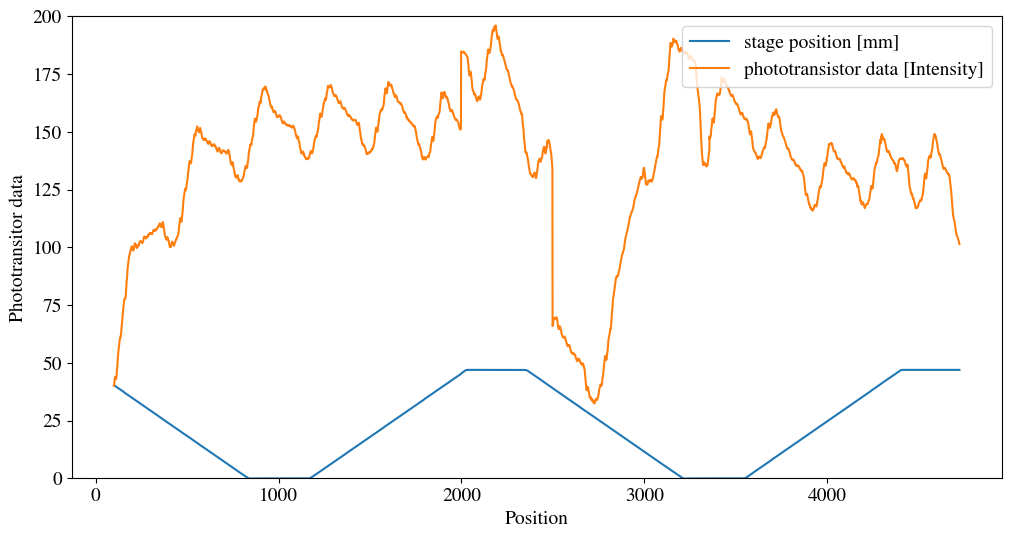

In [13]:
######## from 0012 on ##########

fig, ax = plt.subplots(figsize=(12,6))
#end = len(stage_data)
start = 100
end = len(stage_data)
x = [i for i in range(end)]


#plt.plot(stage_data[start:end], serial_data_all[2][start:end])
#plt.plot(stage_data, serial_data_all[2])
# plot when laser was on! 
#plt.plot(stage_data, [(i*10) for i in serial_data_all[4]])
plt.xlabel('Position')
plt.ylabel('Phototransitor data')


plt.ylim(0,200)

plt.plot(x[start:end], stage_data[start:end], label = 'stage position [mm]')
plt.plot(x[start:end], serial_data_all[2][start:end], label = "phototransistor data [Intensity]")
# plt.plot(x[start:end], serial_data_all[3][start:end])
# plt.plot(x[start:end], serial_data_all[4][start:end])
plt.legend(loc="upper right")

a = 0.5 * 3 * 0.566666 *0.566666
print(((48-2*a)/1.7) + 2*0.566)


In [ ]:
# find local maxima and minima
from scipy.signal import find_peaks
import numpy as np

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=500)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=500)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

x_min, x_max, y_min, y_max = find_min_max_y(PS_data_avg)


Text(0.5, 0, 'Data points')

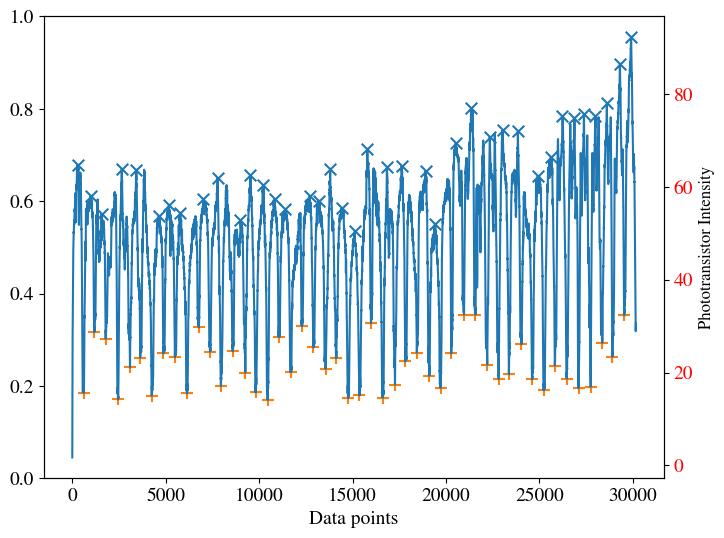

In [ ]:
# Plot with stage and sensor data

x = [i for i in range (0, len(PS_data_avg))]

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1.plot([i for i in range (0, len(serial_data))], stage_data, color="blue")
# ax1.set_ylabel(r"Distance to skin $[mm]$", fontsize=12, color="blue")
# for label in ax1.get_yticklabels():
#     label.set_color("blue")

ax2 = ax1.twinx()
ax2.scatter(x_max, y_max, marker = 'x', zorder = 2, s=70)
ax2.scatter(x_min, y_min, marker = '+', zorder = 2, s=70)
ax2.plot(x, serial_data_all[2])
#ax2.plot(x, serial_data, color="lightgrey", zorder =1)

ax2.set_ylabel("Phototransistor Intensity", fontsize=12)
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel(r"Data points")


In [ ]:
# Read-in difference tape/no tape
freq= 200             # 200ms -> 5Hz

arg_nt_w = "0003"
arg_nt_lb = "0005"
arg_nt_db = "0004"
arg_t_w = "0019"
arg_t_lb = "0020"
arg_t_db = "0016"

file_name_nt_w = f"merge_data/merge_data_{arg_nt_w}.txt"
file_name_nt_lb = f"merge_data/merge_data_{arg_nt_lb}.txt"
file_name_nt_db = f"merge_data/merge_data_{arg_nt_db}.txt"
file_name_t_w = f"merge_data/merge_data_{arg_t_w}.txt"
file_name_t_lb = f"merge_data/merge_data_{arg_t_lb}.txt"
file_name_t_db = f"merge_data/merge_data_{arg_t_db}.txt"

# Open the data 
with open(file_name_nt_w, "r") as f:
    data_nt_w = f.read()

with open(file_name_nt_lb, "r") as f:
    data_nt_lb = f.read()

with open(file_name_nt_db, "r") as f:
    data_nt_db = f.read()

with open(file_name_t_w, "r") as f:
    data_t_w = f.read()

with open(file_name_t_lb, "r") as f:
    data_t_lb = f.read()

with open(file_name_t_db, "r") as f:
    data_t_db = f.read()

# Remove empty points ('')
# for all data below 0012 use clean_data, above clean_data_new
data_nt_w = clean_data(data_nt_w)
data_nt_lb = clean_data(data_nt_lb)
data_nt_db = clean_data(data_nt_db)
data_t_w = clean_data_new(data_t_w)
data_t_lb = clean_data_new(data_t_lb)
data_t_db = clean_data_new(data_t_db)

print(data_t_w)
# Extract stage and serial data
# data[:,0]
serial_data_nt_w = [sublist[1] for sublist in data_nt_w]
serial_data_nt_lb = [sublist[1] for sublist in data_nt_lb]
serial_data_nt_db = [sublist[1] for sublist in data_nt_db]
serial_data_t_w = [sublist[1] for sublist in data_t_w]
serial_data_t_lb = [sublist[1] for sublist in data_t_lb]
serial_data_t_db = [sublist[1] for sublist in data_t_db]

print(serial_data_t_w)


# Find min/max and the y-values
x_min_nt_w, x_max_nt_w, y_min_nt_w, y_max_nt_w = find_min_max_y(serial_data_nt_w)
x_min_nt_lb, x_max_nt_lb, y_min_nt_lb, y_max_nt_lb = find_min_max_y(serial_data_nt_lb)
x_min_nt_db, x_max_nt_db, y_min_nt_db, y_max_nt_db = find_min_max_y(serial_data_nt_db)
x_min_t_w, x_max_t_w, y_min_t_w, y_max_t_w = find_min_max_y(serial_data_t_w)
x_min_t_lb, x_max_t_lb, y_min_t_lb, y_max_t_lb = find_min_max_y(serial_data_t_lb)
x_min_t_db, x_max_t_db, y_min_t_db, y_max_t_db = find_min_max_y(serial_data_t_db)



[[33.99750990160839, 30.0, 3.0, -3.0, 1.0], [32.67749725319412, 35.0, 6.5, -6.0, 0.0], [32.509822395480036, 31.0, 9.6, -9.0, 0.0], [32.38955026764785, 32.0, 12.8, -12.0, 0.0], [32.222049046306964, 32.0, 16.0, -16.0, 0.0], [32.05379540068224, 29.0, 18.9, -18.0, 0.0], [31.93407312136516, 32.0, 22.1, -22.0, 0.0], [31.766195687882355, 30.0, 25.1, -25.0, 0.0], [31.645923560050164, 29.0, 28.0, -28.0, 0.0], [31.47807506596289, 31.0, 31.1, -28.0, 0.0], [31.310921117368395, 30.0, 31.1, -25.0, 0.0], [31.191140959260252, 28.0, 30.4, -21.0, 0.0], [31.02256898028467, 29.0, 30.2, -18.0, 0.0], [30.85474942559293, 29.0, 29.9, -13.0, 0.0], [30.735113964462453, 31.0, 29.8, -11.0, 0.0], [30.567352288561775, 33.0, 30.2, -8.0, 0.0], [30.447051221334053, 31.0, 30.1, -5.0, 0.0], [30.279029090873586, 31.0, 30.2, -2.0, 0.0], [30.11138317255504, 30.0, 30.3, 1.0, 0.0], [29.992181802357543, 35.0, 30.7, 1.0, 0.0], [29.823754520359625, 34.0, 31.1, -1.0, 0.0], [29.65628223841427, 33.0, 31.6, -1.0, 0.0], [29.53612586

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

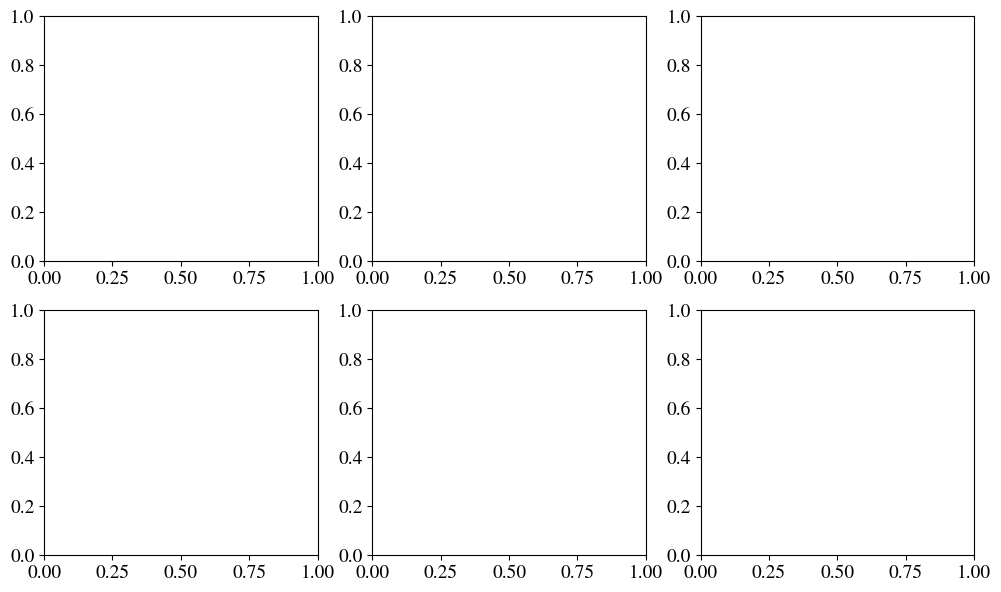

In [ ]:
# Plot difference tape/no tape 
import seaborn as sns

fig, ax = plt.subplots(2,3, figsize=(12,7))
size = 60

# ax[0,0].plot([i for i in range (0, len(serial_data_nt_w))], serial_data_nt_w)
ax[0].scatter([i for i in range(len(y_max_nt_w))], y_max_nt_w, marker = '.', zorder = 2, s=size)
ax[0].scatter([i for i in range(len(y_min_nt_w))], y_min_nt_w, marker = '+', zorder = 2, s=size)
# ax[0,1].plot([i for i in range (0, len(serial_data_nt_lb))], serial_data_nt_lb)
ax[1].scatter([i for i in range(len(y_max_nt_lb))], y_max_nt_lb, marker = '.', zorder = 2, s=size)
ax[1].scatter([i for i in range(len(y_min_nt_lb))], y_min_nt_lb, marker = '+', zorder = 2, s=size)
# ax[0,2].plot([i for i in range (0, len(serial_data_nt_db))], serial_data_nt_db)
ax[0,2].scatter([i for i in range(len(y_max_nt_db))], y_max_nt_db, marker = '.', zorder = 2, s=size, label = "maximum")
ax[0,2].scatter([i for i in range(len(y_min_nt_db))], y_min_nt_db, marker = '+', zorder = 2, s=size, label = "minimum")
# ax[1,0].plot([i for i in range (0, len(serial_data_t_w))], serial_data_t_w)
ax[1,0].scatter([i for i in range(len(y_max_t_w))], y_max_t_w, marker = '.', zorder = 2, s=size)
ax[1,0].scatter([i for i in range(len(y_min_t_w))], y_min_t_w, marker = '+', zorder = 2, s=size)
# ax[1,1].plot([i for i in range (0, len(serial_data_t_lb))], serial_data_t_lb)
ax[1,1].scatter([i for i in range(len(y_max_t_lb))], y_max_t_lb, marker = '.', zorder = 2, s=size)
ax[1,1].scatter([i for i in range(len(y_min_t_lb))], y_min_t_lb, marker = '+', zorder = 2, s=size)
# ax[1,2].plot([i for i in range (0, len(serial_data_t_db))], serial_data_t_db)
ax[1,2].scatter([i for i in range(len(y_max_t_db))], y_max_t_db, marker = '.', zorder = 2, s=size)
ax[1,2].scatter([i for i in range(len(y_min_t_db))], y_min_t_db, marker = '+', zorder = 2, s=size)

# set labels
ax[0,0].set(ylabel='Intensity')
ax[1,0].set(xlabel='# of cycle', ylabel='Intensity')
ax[1,1].set(xlabel='# of cycle')
ax[1,2].set(xlabel='# of cycle')

# set titles
ax[0,0].set_title('white silicon')
ax[0,1].set_title('light brown silicon')
ax[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=16)

ax[0,2].legend(loc="upper right")

ax[1,0].set_ylim([0,200])   
ax[1,1].set_ylim([0,200])   
ax[1,2].set_ylim([0,200]) 
ax[0,0].set_ylim([0,650])   
ax[0,1].set_ylim([0,650])   
ax[0,2].set_ylim([0,650])   

for axis in ax.flat:
  
    #axis.set_xlim([0,51])
    axis.set_xticks([0,10,20,30,40,50])
    sns.despine()

In [408]:
# Linearer fit und standartabweichung 

import numpy as np
import pandas as pd
import statistics
from scipy.optimize import curve_fit


#args = ['0019', '0014', '0015', '0021', '0018', '0022']
args = ['0021', '0023', '0022']
frames = []

def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)
            
    return valid_data

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=450)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=450)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

for arg in range(len(args)):
    file_index = args[arg]

    file_name = f"merge_data/merge_data_{file_index}.txt"

    # Open the data 
    with open(file_name, "r") as f:
        data = f.read()

    # Remove empty points ('')
    data = clean_data_new(data)

    # transpose data
    data_transposed = list(map(list, zip(*data)))

    # Find min/max and the y-values (averages)
    x_min, x_max, y_min, y_max = find_min_max_y(data_transposed[2])

    min = { 'index': [i for i in range(len(y_min))],
            'x_min': x_min,
            'y_min': y_min}
    
    max = { 'index': [i for i in range(len(y_max))],
            'x_max': x_max,
            'y_max': y_max}

    sensor_data = {'stage': data_transposed[0],
                       'raw': data_transposed[1],
                       'avg': data_transposed[2],
                       'dev': data_transposed[3],
                       'led': data_transposed[4]}
    print(len(data_transposed[0]))
    
    pd_data = pd.DataFrame(data=sensor_data)
    pd_min = pd.DataFrame(data=min)
    pd_max = pd.DataFrame(data=max)

    frames.append([file_index, pd_data, pd_min, pd_max])

30168
30725
30531


In [409]:
### TODOS ###

calcs = []
lin_reg = []

def func(x, a, b):
    y = []
    for i in range(len(x)):
        y.append(x[i]*a + b)
    return y

for i in range(len(args)):
    # calculate standart deviation
    std_min = np.std(list(frames[i][2].y_min))
    std_max = np.std(list(frames[i][3].y_max))

    # caluclate mean
    avg_min = statistics.mean(frames[i][2].y_min)
    avg_max = statistics.mean(frames[i][3].y_max)

    # make linear regression for min values
    popt_min, _ = curve_fit(func, frames[i][2].index, frames[i][2].y_min)
    popt_max, _ = curve_fit(func, frames[i][3].index, frames[i][3].y_max)

    y_min_temp = list(frames[i][2].y_min)
    drift = []
    
    for n in range(2, len(frames[i][2].y_min)):
        drift.append((y_min_temp[n]/y_min_temp[1])*100)

    print(drift)
    
    calcs.append([args[i], std_min, std_max, avg_min, avg_max, popt_min, popt_max, drift])
   


[95.1219512195122, 49.47735191637631, 73.5191637630662, 80.8362369337979, 52.264808362369344, 83.97212543554008, 81.18466898954703, 54.00696864111498, 103.48432055749129, 85.36585365853658, 59.581881533101054, 85.71428571428572, 69.68641114982579, 54.70383275261324, 49.12891986062718, 96.51567944250871, 70.03484320557492, 104.52961672473869, 88.50174216027874, 72.47386759581882, 80.48780487804879, 50.522648083623686, 52.613240418118465, 106.62020905923346, 50.87108013937283, 60.62717770034843, 78.04878048780488, 84.66898954703834, 67.24738675958189, 58.18815331010453, 83.97212543554008, 113.2404181184669, 113.2404181184669, 75.60975609756098, 64.80836236933798, 68.29268292682927, 90.94076655052265, 64.45993031358886, 56.44599303135889, 74.91289198606272, 65.1567944250871, 57.8397212543554, 58.88501742160278, 91.98606271777004, 81.53310104529616, 112.54355400696863]
[89.47368421052632, 74.64114832535886, 104.78468899521532, 107.17703349282297, 70.33492822966507, 80.38277511961724, 65.07

32.5
50.5
32.2
42.5
29.3
42.2


Text(0.5, 0.96, 'Phototransistor measurements, range 0...48mm, different skin tones')

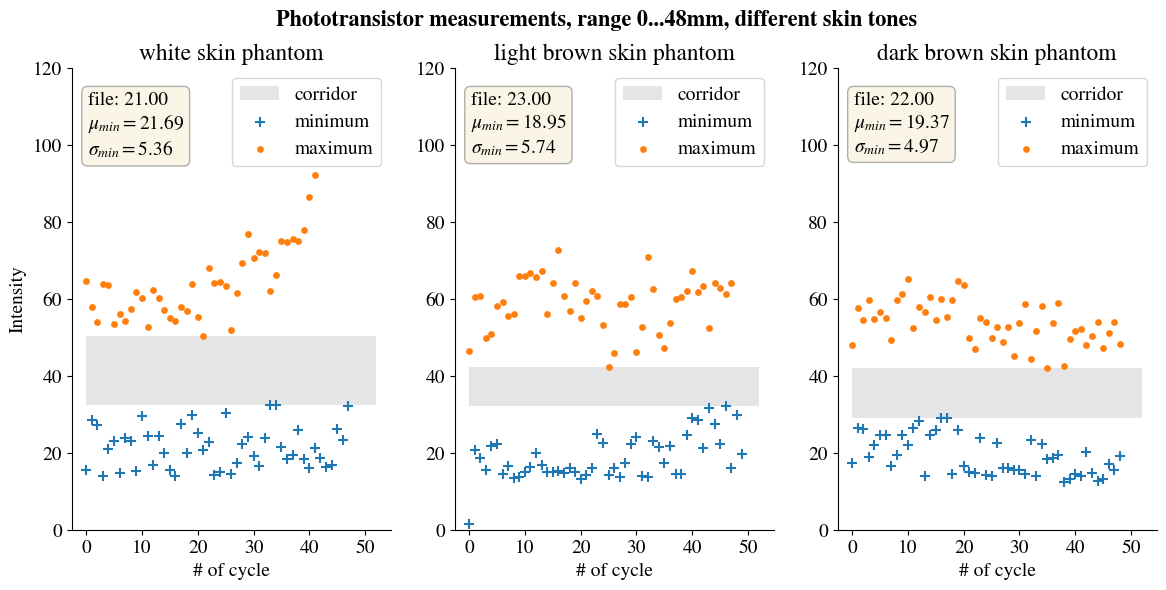

In [410]:
# Plot difference tape/no tape 
import seaborn as sns
import matplotlib.patches as patches

fig, axs = plt.subplots(1,3, figsize=(14,6))
size = 60

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)


for i, ax in enumerate(axs.flatten()):
    # frames = [file_index, pd_data, pd_min, pd_max]

    
    textstr = '\n'.join((
    r'file: %.2f' % ((round(int(args[i]), 0)), ),
    r'$\mu_{min}=%.2f$' % (round(calcs[i][3], 2), ),
    r'$\sigma_{min}=%.2f$' % (round(calcs[i][1], 2), )))
    # r'$a_{min}=%.2f$' % (calcs[i][5][0], ),
    # r'$b_{min}=%.2f$' % (calcs[i][5][1], ))) 

    # plot lin_reg
    #ax.plot(list(frames[i][2].index), func(list(frames[i][2].index), calcs[i][5][0], calcs[i][5][1]), 'b-', label = '$x * a + b$') 
    y_min_temp = np.array(list(frames[i][2].y_min))
    y_max_temp = np.array(list(frames[i][3].y_max))
    
    min_max = y_max_temp.min()
    max_min = y_min_temp.max()

    print(y_min_temp.max())
    print(y_max_temp.min())

    # ax.add_patch(patches.Rectangle((0,y_min_temp.max()), 52, y_min_temp.max()-y_min_temp.max(),linewidth=0, color='grey', alpha=0.20, label="laser always on", hatch = 'xxxx'))
    ax.add_patch(patches.Rectangle((0,max_min), 52,min_max-max_min ,linewidth=0, color='grey', alpha=0.20, label="corridor"))

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    ax.scatter(list(frames[i][2].index), list(frames[i][2].y_min), marker = '+', zorder = 2, s=size, label = 'minimum')
    ax.scatter(list(frames[i][3].index), list(frames[i][3].y_max), marker = '.', zorder = 2, s=size, label = 'maximum')
    
    ax.legend(loc="upper right")

    ax.set_xticks([0,10,20,30,40,50])
    ax.set_ylim([0,120])
    ax.set(xlabel='# of cycle')

    sns.despine()

# # set labels
axs[0].set(ylabel='Intensity')
# 
# # set titles
axs[0].set_title('white skin phantom')
axs[1].set_title('light brown skin phantom')
axs[2].set_title('dark brown skin phantom')

fig.text(0.5, 0.96, 'Phototransistor measurements, range 0...48mm, different skin tones', va='center', ha='center', rotation='horizontal', fontsize=16, weight='bold')
# fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=16)




In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,6))

for i, ax in enumerate(axs.flatten()):
    ax.scatter([n for n in range(len(frames[i][2].y_min)-2)], calcs[i][7])
    ax.set_ylim([0,150])
    ax.set(xlabel='# of cycle')
    ax.hlines(y=100, xmin=0, xmax=50, linewidth=2, color='r')

axs[0].set(ylabel='Drift [%]')

axs[0].set_title('white silicon')
axs[1].set_title('light brown silicon')
axs[2].set_title('dark brown silicon')

fig.text(0.5, 0.96, 'Drift in of minimum values in percent [first value is reference]', va='center', ha='center', rotation='horizontal', fontsize=16, weight='bold')



[['26', '0.87', '0.00', '1'], ['45', '2.37', '-2.00', '1'], ['25', '3.20', '-3.00', '1'], ['36', '4.40', '-4.00', '1'], ['22', '5.13', '-5.00', '0'], ['36', '6.33', '-6.00', '0'], ['20', '7.00', '-7.00', '0'], ['34', '8.13', '-8.00', '0'], ['20', '8.80', '-8.00', '0'], ['36', '10.00', '-10.00', '0'], ['21', '10.70', '-10.00', '0'], ['38', '11.97', '-11.00', '0'], ['19', '12.60', '-12.00', '0'], ['36', '13.80', '-13.00', '0'], ['24', '14.60', '-14.00', '0'], ['36', '15.80', '-15.00', '0'], ['19', '16.43', '-16.00', '0'], ['35', '17.60', '-17.00', '0'], ['19', '18.23', '-18.00', '0'], ['32', '19.30', '-19.00', '0'], ['17', '19.87', '-19.00', '0'], ['35', '21.03', '-21.00', '0'], ['17', '21.60', '-21.00', '0'], ['34', '22.73', '-22.00', '0'], ['18', '23.33', '-23.00', '0'], ['32', '24.40', '-24.00', '0'], ['17', '24.97', '-24.00', '0'], ['34', '26.10', '-26.00', '0'], ['18', '26.70', '-26.00', '0'], ['34', '27.83', '-27.00', '0'], ['18', '27.57', '-25.00', '0'], ['31', '27.10', '-24.00', 

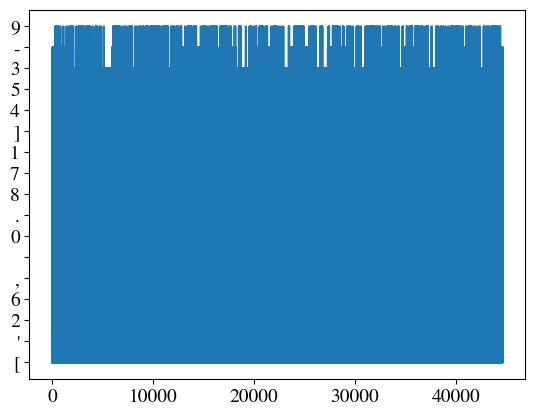

ValueError: could not convert string to float: '['

In [378]:
# plot without stage data 

file_index = "0026"
file_name = f"merge_data/merge_data_{file_index}.txt"

# Open the data 
with open(file_name, "r") as f:
    data = f.read()

print(data)
for item in data:
    item=item.strip()

#data = [[float(value[0]) for value in sublist] for sublist in data]

y = [sublist[0] for sublist in data]
x = [i for i in range(len(y))]

plt.plot(x,y)
plt.show()

data = list(map(float, data))

print(data)
# Remove empty points ('')
data = clean_data_new(data)

 # transpose data
data_transposed = list(map(list, zip(*data)))